<a href="https://colab.research.google.com/github/Abishek-Subramaniam/Delhivery/blob/main/delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 141MB/s]


In [ ]:
df=pd.read_csv('delhivery_data.csv')
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [ ]:
# Shape of the dataset -

print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 144867
No. of cols: 24


Column Profiling:
1. data - tells whether the data is testing or training data
2. trip_creation_time – Timestamp of trip creation
3. route_schedule_uuid – Unique ID for a particular route schedule
4. route_type – Transportation type
a. FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck
is making no other pickups or drop-offs along the way
b. Carting: Handling system consisting of small vehicles (carts)
5. trip_uuid - Unique ID given to a particular trip (A trip may include different source and
destination centers)
6. source_center - Source ID of trip origin
7. source_name - Source Name of trip origin
8. destination_cente – Destination ID
9. destination_name – Destination Name
10. od_start_time – Trip start time

11. od_end_time – Trip end time
12. start_scan_to_end_scan – Time taken to deliver from source to destination
13. is_cutoff – Unknown field
14. cutoff_factor – Unknown field
15. cutoff_timestamp – Unknown field
16. actual_distance_to_destination – Distance in kms between source and destination
warehouse
17. actual_time – Actual time taken to complete the delivery (Cumulative)
18. osrm_time – An open-source routing engine time calculator which computes the
shortest path between points in a given map (Includes usual traffic, distance through
major and minor roads) and gives the time (Cumulative)
19. osrm_distance – An open-source routing engine which computes the shortest path
between points in a given map (Includes usual traffic, distance through major and minor
roads) (Cumulative)
20. factor – Unknown field
21. segment_actual_time – This is a segment time. Time taken by the subset of the
package delivery
22. segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the
package delivery
23. segment_osrm_distance – This is the OSRM distance. Distance covered by subset of
the package delivery
24. segment_factor – Unknown field

In [ ]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [ ]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [ ]:
# droping route_schedule_time column

df.drop(columns=['route_schedule_uuid'],
                  inplace=True)



In [ ]:
df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
# checking the rows with null values
df[df.isnull().any(axis=1)]

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
110,training,2018-09-25 08:53:04.377810,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,...,2018-09-26 05:57:25,24.538214,58.0,33.0,30.8845,1.757576,58.0,33.0,30.8845,1.757576
111,training,2018-09-25 08:53:04.377810,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,2018-09-26 06:58:08.054001,...,2018-09-26 05:04:49.254901,34.657709,110.0,43.0,41.5361,2.558140,52.0,10.0,10.6517,5.200000
112,training,2018-09-25 08:53:04.377810,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144484,test,2018-10-03 09:06:06.690094,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,...,2018-10-03 20:54:08,45.134384,62.0,45.0,47.7734,1.377778,34.0,23.0,23.6601,1.478261
144485,test,2018-10-03 09:06:06.690094,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,...,2018-10-03 20:30:09,66.542266,86.0,71.0,71.9549,1.211268,23.0,25.0,24.1815,0.920000
144486,test,2018-10-03 09:06:06.690094,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,...,2018-10-03 20:00:08,88.143957,116.0,114.0,112.6943,1.017544,30.0,43.0,40.7394,0.697674
144487,test,2018-10-03 09:06:06.690094,FTL,trip-153855756668984584,IND282002AAD,NaN,IND474003AAA,Gwalior_HrihrNgr_I (Madhya Pradesh),2018-10-03 17:34:21.835475,2018-10-03 22:10:43.366324,...,2018-10-03 19:02:11,111.084417,173.0,123.0,134.1940,1.406504,57.0,45.0,46.9217,1.266667


In [ ]:
#droping a rows with null values

df.dropna(axis=0, how='any', inplace=True)

df.shape

(144316, 23)

In [ ]:
#Converting Time Columns to Datetime

df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_type                      144316 non-null  object        
 3   trip_uuid                       144316 non-null  object        
 4   source_center                   144316 non-null  object        
 5   source_name                     144316 non-null  object        
 6   destination_center              144316 non-null  object        
 7   destination_name                144316 non-null  object        
 8   od_start_time                   144316 non-null  datetime64[ns]
 9   od_end_time                     144316 non-null  datetime64[ns]
 10  start_scan_to_end_scan          144316 non-null  float64     

In [ ]:
#Creating  a unique identifier for different segments of a trip based on the combination of the trip_uuid, source_center, and destination_center and name it as segment_key.

df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']


In [ ]:
df.head(10)

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB
5,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320_IND388620AAB_IND388320AAA
6,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667,trip-153741093647649320_IND388620AAB_IND388320AAA
7,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091,trip-153741093647649320_IND388620AAB_IND388320AAA
8,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000,trip-153741093647649320_IND388620AAB_IND388320AAA
9,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333,trip-153741093647649320_IND388620AAB_IND388320AAA


In [ ]:
df.shape

(144316, 24)

In [ ]:
#Aggregating at segment level using segment key

segment_agg = df.groupby('segment_key').agg({
    'segment_actual_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_osrm_time': 'sum'
}).reset_index()

# Rename columns
segment_agg.rename(columns={
    'segment_actual_time': 'segment_actual_time_sum',
    'segment_osrm_distance': 'segment_osrm_distance_sum',
    'segment_osrm_time': 'segment_osrm_time_sum'
}, inplace=True)


In [ ]:
segment_agg

,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,608.0,317.7408,231.0
...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,49.0,42.1431,42.0
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,89.0,78.5869,77.0
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,29.0,16.0184,14.0
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,233.0,52.5303,42.0


In [ ]:
type(segment_agg)


pandas.core.frame.DataFrame

In [ ]:
# Merge the segment_agg DataFrame with the original DataFrame
df = df.merge(segment_agg, on='segment_key')

df

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,training,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,67.9280,1.566667,12.0,12.0,8.1858,1.000000,trip-153746066843555182_IND131028AAB_IND000000ACB,423.0,131.1238,185.0
144312,training,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,85.6829,1.578947,26.0,21.0,17.3725,1.238095,trip-153746066843555182_IND131028AAB_IND000000ACB,423.0,131.1238,185.0
144313,training,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,97.0933,1.590909,20.0,34.0,20.7053,0.588235,trip-153746066843555182_IND131028AAB_IND000000ACB,423.0,131.1238,185.0
144314,training,2018-09-20 16:24:28.436231,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,111.2709,1.612245,17.0,27.0,18.8885,0.629630,trip-153746066843555182_IND131028AAB_IND000000ACB,423.0,131.1238,185.0


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

In [ ]:

# Creating the dictionary for aggregation
create_segment_dict = {
    'trip_uuid': 'first',
    'source_center': 'first',
    'destination_center': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last'
}



# Performing the aggregation
segment_df = df.groupby('segment_key').agg(create_segment_dict).reset_index()

# Sorting the DataFrame
segment_df.sort_values(by=['segment_key', 'od_end_time'], inplace=True)

segment_df


,segment_key,trip_uuid,source_center,destination_center,od_start_time,od_end_time,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,trip-153861115439069069,IND628204AAA,IND627657AAA,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,49.0,42.1431,42.0
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,trip-153861115439069069,IND628613AAA,IND627005AAA,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,89.0,78.5869,77.0
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,trip-153861115439069069,IND628801AAA,IND628204AAA,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,29.0,16.0184,14.0
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,trip-153861118270144424,IND583119AAA,IND583101AAA,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,233.0,52.5303,42.0


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

In [ ]:
df.shape

(144316, 27)

In [ ]:
#Calculate Time Differences

df['od_time_diff_hour'] = round(((df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600),2)

df.head(10)

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0,1.44
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0,1.44
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0,1.44
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0,1.44
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0,1.44
5,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,1.363636,15.0,11.0,12.1171,1.363636,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0,1.82
6,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,2.588235,28.0,6.0,9.1719,4.666667,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0,1.82
7,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,2.241379,21.0,11.0,14.5362,1.909091,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0,1.82
8,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,1.948718,10.0,10.0,11.3648,1.000000,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0,1.82
9,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,2.266667,26.0,6.0,6.0434,4.333333,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0,1.82


In [ ]:
#Extract Features from Names:

#Defining a function to safely split the destination name

def split_destination_name(name):
    if isinstance(name, str):
        parts = name.split('_')
        if len(parts) >= 3:
            city = parts[0]
            place = parts[1]
            code_state = '_'.join(parts[2:])
            code, state = code_state.rsplit(' ', 1)
            state = state.strip(' ()')
            return city, place, code, state
    return None, None, None, None

# Apply the function and create new columns
df[['destination_city', 'destination_place', 'destination_code', 'destination_state']] = df['destination_name'].apply(lambda x: pd.Series(split_destination_name(x)))


In [ ]:
df.head(10)

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,segment_factor,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,destination_city,destination_place,destination_code,destination_state
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,1.272727,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0,1.44,Khambhat,MotvdDPP,D,Gujarat
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,1.111111,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0,1.44,Khambhat,MotvdDPP,D,Gujarat
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2.285714,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0,1.44,Khambhat,MotvdDPP,D,Gujarat
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,1.750000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0,1.44,Khambhat,MotvdDPP,D,Gujarat
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,1.200000,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0,1.44,Khambhat,MotvdDPP,D,Gujarat
5,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,1.363636,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0,1.82,Anand,Vaghasi,IP,Gujarat
6,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,4.666667,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0,1.82,Anand,Vaghasi,IP,Gujarat
7,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,1.909091,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0,1.82,Anand,Vaghasi,IP,Gujarat
8,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,1.000000,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0,1.82,Anand,Vaghasi,IP,Gujarat
9,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,4.333333,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0,1.82,Anand,Vaghasi,IP,Gujarat


In [ ]:
#Defining a function to safely split the source name

def split_source_name(name):
    if isinstance(name, str):
        parts = name.split('_')
        if len(parts) >= 3:
            city = parts[0]
            place = parts[1]
            code_state = '_'.join(parts[2:])
            code, state = code_state.rsplit(' ', 1)
            state = state.strip('()')
            return city, place, code, state
    return None, None, None, None

# Apply the function and create new columns
df[['source_city', 'source_place', 'source_code', 'source_state']] = df['source_name'].apply(lambda x: pd.Series(split_source_name(x)))

In [ ]:
df.head(10)

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,segment_osrm_time_sum,od_time_diff_hour,destination_city,destination_place,destination_code,destination_state,source_city,source_place,source_code,source_state
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,44.0,1.44,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,44.0,1.44,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,44.0,1.44,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,44.0,1.44,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,44.0,1.44,Khambhat,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat
5,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,44.0,1.82,Anand,Vaghasi,IP,Gujarat,Khambhat,MotvdDPP,D,Gujarat
6,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,44.0,1.82,Anand,Vaghasi,IP,Gujarat,Khambhat,MotvdDPP,D,Gujarat
7,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,44.0,1.82,Anand,Vaghasi,IP,Gujarat,Khambhat,MotvdDPP,D,Gujarat
8,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,44.0,1.82,Anand,Vaghasi,IP,Gujarat,Khambhat,MotvdDPP,D,Gujarat
9,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,...,44.0,1.82,Anand,Vaghasi,IP,Gujarat,Khambhat,MotvdDPP,D,Gujarat


In [ ]:
#Extract Time Features:

df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_day'] = df['trip_creation_time'].dt.day


In [ ]:
df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,destination_place,destination_code,destination_state,source_city,source_place,source_code,source_state,trip_creation_year,trip_creation_month,trip_creation_day
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat,2018,9,20
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat,2018,9,20
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat,2018,9,20
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat,2018,9,20
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat,2018,9,20


In [ ]:
segment_df

,segment_key,trip_uuid,source_center,destination_center,od_start_time,od_end_time,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,trip-153861115439069069,IND628204AAA,IND627657AAA,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,49.0,42.1431,42.0
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,trip-153861115439069069,IND628613AAA,IND627005AAA,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,89.0,78.5869,77.0
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,trip-153861115439069069,IND628801AAA,IND628204AAA,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,29.0,16.0184,14.0
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,trip-153861118270144424,IND583119AAA,IND583101AAA,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,233.0,52.5303,42.0


In [ ]:
df[['is_cutoff','cutoff_factor','cutoff_timestamp','segment_factor','factor']]


,is_cutoff,cutoff_factor,cutoff_timestamp,segment_factor,factor
0,True,9,2018-09-20 04:27:55,1.272727,1.272727
1,True,18,2018-09-20 04:17:55,1.111111,1.200000
2,True,27,NaT,2.285714,1.428571
3,True,36,2018-09-20 03:39:57,1.750000,1.550000
4,False,39,2018-09-20 03:33:55,1.200000,1.545455
...,...,...,...,...,...
144311,True,45,2018-09-20 21:57:20,1.000000,1.566667
144312,True,54,2018-09-20 21:31:18,1.238095,1.578947
144313,True,63,2018-09-20 21:11:18,0.588235,1.590909
144314,True,72,2018-09-20 20:53:19,0.629630,1.612245


In [ ]:
unknown_fields=['is_cutoff','cutoff_factor','cutoff_timestamp','segment_factor','factor']
unknown_fields

['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'segment_factor', 'factor']

In [ ]:
columns_to_drop= ['source_name','destination_name','is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'segment_factor', 'factor']

df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head()

,data,trip_creation_time,route_type,trip_uuid,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,...,destination_place,destination_code,destination_state,source_city,source_place,source_code,source_state,trip_creation_year,trip_creation_month,trip_creation_day
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat,2018,9,20
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat,2018,9,20
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat,2018,9,20
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat,2018,9,20
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,...,MotvdDPP,D,Gujarat,Anand,VUNagar,DC,Gujarat,2018,9,20


In [ ]:
df[['segment_key','actual_time','osrm_distance','osrm_time']]

,segment_key,actual_time,osrm_distance,osrm_time
0,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,28.0
3,trip-153741093647649320_IND388121AAA_IND388620AAB,62.0,45.5620,40.0
4,trip-153741093647649320_IND388121AAA_IND388620AAB,68.0,54.2181,44.0
...,...,...,...,...
144311,trip-153746066843555182_IND131028AAB_IND000000ACB,94.0,67.9280,60.0
144312,trip-153746066843555182_IND131028AAB_IND000000ACB,120.0,85.6829,76.0
144313,trip-153746066843555182_IND131028AAB_IND000000ACB,140.0,97.0933,88.0
144314,trip-153746066843555182_IND131028AAB_IND000000ACB,158.0,111.2709,98.0


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_type', 'trip_uuid',
       'source_center', 'destination_center', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_key',
       'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum', 'od_time_diff_hour', 'destination_city',
       'destination_place', 'destination_code', 'destination_state',
       'source_city', 'source_place', 'source_code', 'source_state',
       'trip_creation_year', 'trip_creation_month', 'trip_creation_day'],
      dtype='object')

In [ ]:
#creating dict to perform aggregation using segment key for further analysis

dict = {
    'route_type': 'first',
    'trip_uuid': 'first',
    'trip_creation_time': 'first',
    'trip_creation_year': 'first',
    'trip_creation_month': 'first',
    'source_center': 'first',
    'source_city': 'first',
    'source_state': 'first',
    'destination_center': 'last',
    'destination_city': 'last',
    'destination_state': 'last',
    'actual_distance_to_destination': 'last',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'od_time_diff_hour':'last',
     'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last'
}

final_df = df.groupby('segment_key').agg(dict).reset_index()

In [ ]:
final_df.shape

(26222, 22)

In [ ]:
final_df

,segment_key,route_type,trip_uuid,trip_creation_time,trip_creation_year,trip_creation_month,source_center,source_city,source_state,destination_center,...,actual_distance_to_destination,od_start_time,od_end_time,od_time_diff_hour,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748_IND209304AAA_IND000000ACB,FTL,trip-153671041653548748,2018-09-12 00:00:16.535741,2018,9,IND209304AAA,Kanpur,Pradesh,IND000000ACB,...,383.759164,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,21.01,6484.0,3464.0,4540.1261,728.0,670.6205,534.0
1,trip-153671041653548748_IND462022AAA_IND209304AAA,FTL,trip-153671041653548748,2018-09-12 00:00:16.535741,2018,9,IND462022AAA,Bhopal,Pradesh,IND209304AAA,...,440.973689,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,16.66,9198.0,4323.0,6037.6386,820.0,649.8528,474.0
2,trip-153671042288605164_IND561203AAB_IND562101AAA,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,2018,9,IND561203AAB,Doddablpur,Karnataka,IND562101AAA,...,24.644021,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,0.98,96.0,55.0,60.3157,46.0,28.1995,26.0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,2018,9,IND572101AAA,Tumkur,Karnataka,IND561203AAB,...,48.542890,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2.05,303.0,155.0,209.1151,95.0,55.9899,39.0
4,trip-153671043369099517_IND000000ACB_IND160002AAC,FTL,trip-153671043369099517,2018-09-12 00:00:33.691250,2018,9,IND000000ACB,Gurgaon,Haryana,IND160002AAC,...,237.439610,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,13.91,2601.0,1427.0,1975.7409,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,Carting,trip-153861115439069069,2018-10-03 23:59:14.390954,2018,10,IND628204AAA,Tirchchndr,Nadu,IND627657AAA,...,33.627182,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,1.04,119.0,106.0,106.7084,49.0,42.1431,42.0
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,Carting,trip-153861115439069069,2018-10-03 23:59:14.390954,2018,10,IND628613AAA,Peikulam,Nadu,IND627005AAA,...,33.673835,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,1.52,173.0,108.0,111.8555,89.0,78.5869,77.0
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,Carting,trip-153861115439069069,2018-10-03 23:59:14.390954,2018,10,IND628801AAA,Eral,Nadu,IND628204AAA,...,12.661945,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,0.74,51.0,22.0,25.5371,29.0,16.0184,14.0
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,FTL,trip-153861118270144424,2018-10-03 23:59:42.701692,2018,10,IND583119AAA,Sandur,Karnataka,IND583101AAA,...,40.546740,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,4.79,278.0,59.0,76.5169,233.0,52.5303,42.0


In [ ]:
final_df.columns

Index(['segment_key', 'route_type', 'trip_uuid', 'trip_creation_time',
       'trip_creation_year', 'trip_creation_month', 'source_center',
       'source_city', 'source_state', 'destination_center', 'destination_city',
       'destination_state', 'actual_distance_to_destination', 'od_start_time',
       'od_end_time', 'od_time_diff_hour', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

Text(0, 0.5, '')

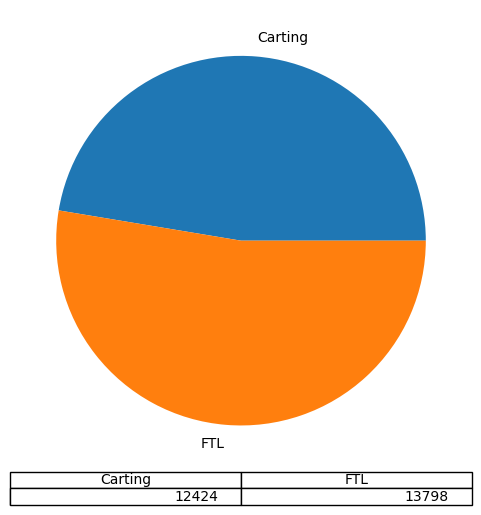

In [ ]:
# visualizing the route type
final_df.groupby(['route_type']).size().plot(kind="pie", stacked=True, figsize=(6, 6), table=True)
plt.ylabel("")

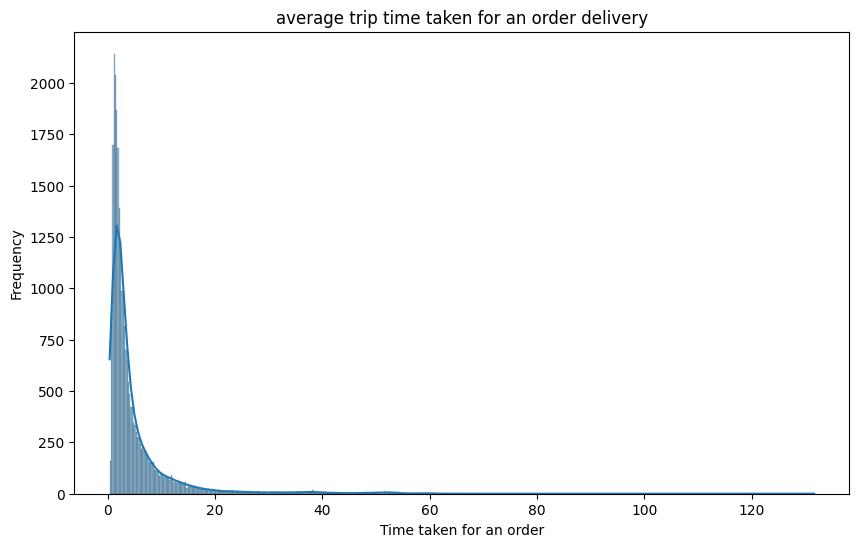

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df,x='od_time_diff_hour',kde=True)
plt.xlabel('Time taken for an order')
plt.ylabel('Frequency')
plt.title('average trip time taken for an order delivery')
plt.show()


In [ ]:
#average trip time taken for an order delivery

final_df['od_time_diff_hour'].describe()

count    26222.000000
mean         4.983918
std          7.351885
min          0.350000
25%          1.520000
50%          2.540000
75%          5.120000
max        131.640000
Name: od_time_diff_hour, dtype: float64

The averge trip time taken for order delivery is around 5 hours and 75% of order has been delivered within 5.12 hours.

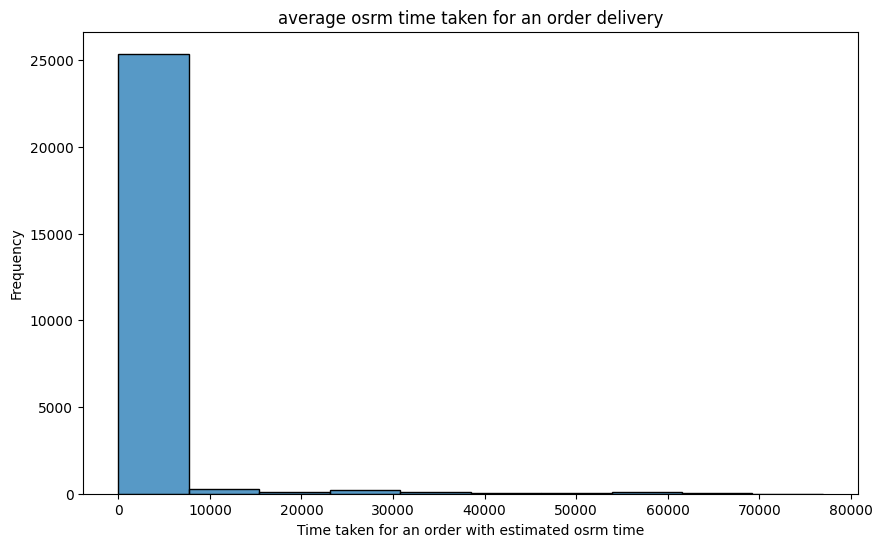

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df,x='osrm_time',bins=10)
plt.xlabel('Time taken for an order with estimated osrm time')
plt.ylabel('Frequency')
plt.title('average osrm time taken for an order delivery')
plt.show()

In [ ]:
#average estimated osrm time taken for an order delivery

final_df['osrm_time'].describe()

count    26222.000000
mean      1180.180688
std       5909.330938
min          6.000000
25%         46.000000
50%         89.000000
75%        219.000000
max      76953.000000
Name: osrm_time, dtype: float64

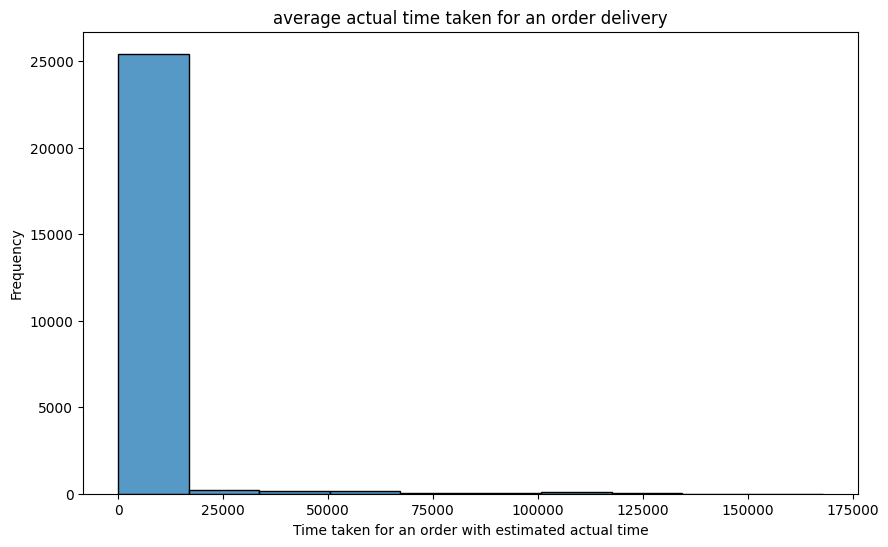

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df,x='actual_time',bins=10)
plt.xlabel('Time taken for an order with estimated actual time')
plt.ylabel('Frequency')
plt.title('average actual time taken for an order delivery')
plt.show()

In [ ]:
#average estimated actual time taken for an order delivery

final_df['actual_time'].describe()

count     26222.000000
mean       2300.493669
std       11268.597910
min           9.000000
25%          91.000000
50%         181.000000
75%         449.000000
max      167920.000000
Name: actual_time, dtype: float64

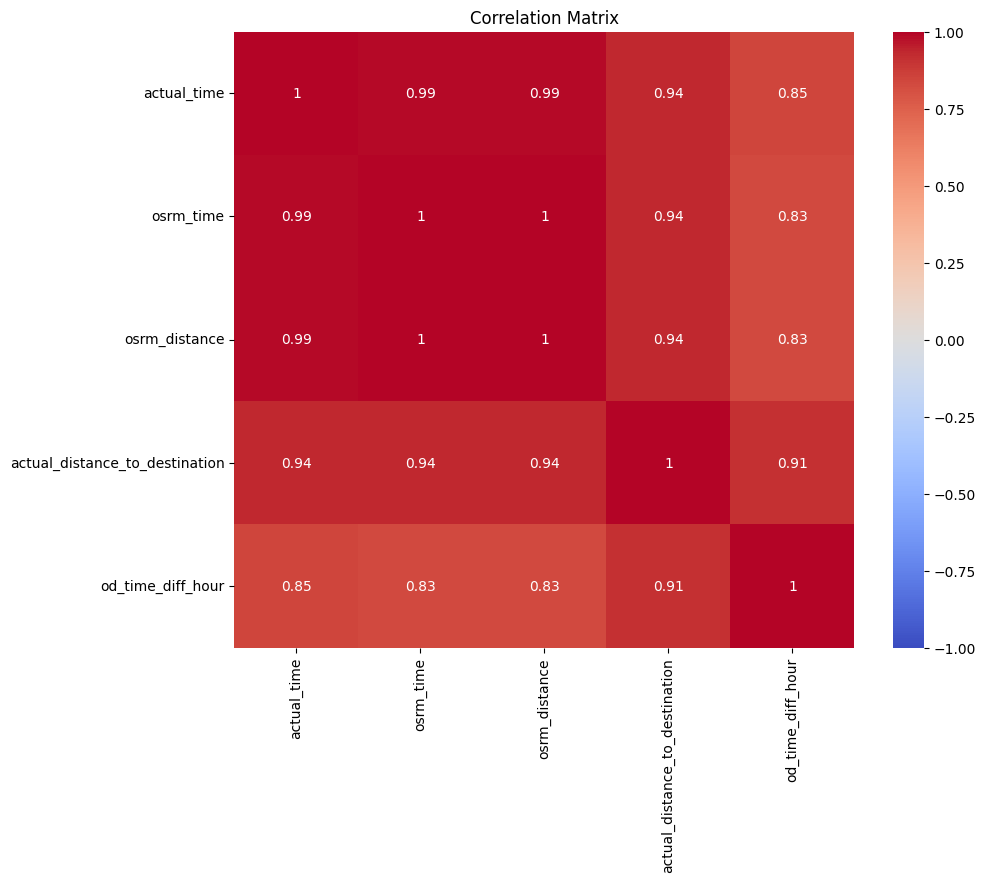

In [ ]:
# Compute correlation matrix
correlation_matrix = final_df[['actual_time', 'osrm_time', 'osrm_distance', 'actual_distance_to_destination', 'od_time_diff_hour']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Based on segmented key which created 'actual_time', 'osrm_time', 'osrm_distance', 'actual_distance_to_destination', 'od_time_diff_hour' these feilds are highly correlated.

In [ ]:
# Trip-Level Aggregation:

create_trip_dict = {
    'trip_creation_time': 'first',
    'source_city': 'first',
    'destination_city': 'last',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'od_time_diff_hour':'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last'
}

trip_df = final_df.groupby('trip_uuid').agg(create_trip_dict).reset_index()


In [ ]:
trip_df.head()

,trip_uuid,trip_creation_time,source_city,destination_city,od_start_time,od_end_time,od_time_diff_hour,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748,2018-09-12 00:00:16.535741,Kanpur,Kanpur,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,16.66,9198.0,4323.0,6037.6386,820.0,649.8528,474.0
1,trip-153671042288605164,2018-09-12 00:00:22.886430,Doddablpur,Doddablpur,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,2.05,303.0,155.0,209.1151,95.0,55.9899,39.0
2,trip-153671043369099517,2018-09-12 00:00:33.691250,Gurgaon,Gurgaon,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,51.66,109624.0,64341.0,87471.5079,2700.0,2227.5270,1710.0
3,trip-153671046011330457,2018-09-12 00:01:00.113710,None,Mumbai,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.67,82.0,24.0,31.6475,59.0,19.8766,16.0
4,trip-153671052974046625,2018-09-12 00:02:09.740725,Sandur,Sandur,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,1.34,97.0,48.0,53.1588,63.0,29.5697,26.0


In [ ]:
trip_df.shape

(14787, 13)

In [ ]:
trip_df.columns

Index(['trip_uuid', 'trip_creation_time', 'source_city', 'destination_city',
       'od_start_time', 'od_end_time', 'od_time_diff_hour', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_distance_sum', 'segment_osrm_time_sum'],
      dtype='object')

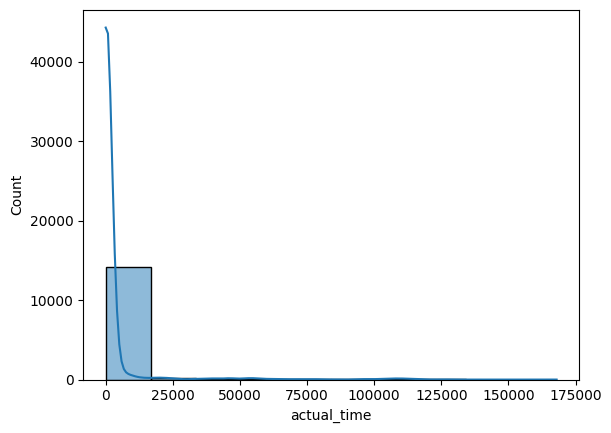

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Detect outliers
sns.histplot(data=trip_df['actual_time'],bins=10,kde=True)
plt.show()

# Handle outliers using IQR
Q1 = trip_df['actual_time'].quantile(0.25)
Q3 = trip_df['actual_time'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
range = trip_df[(trip_df['actual_time'] >= lower_bound) & (trip_df['actual_time'] <= upper_bound)]


In [ ]:
trip_df['actual_time'].describe()

count     14787.000000
mean       3020.341516
std       13496.577155
min           9.000000
25%          96.000000
50%         196.000000
75%         513.500000
max      167920.000000
Name: actual_time, dtype: float64

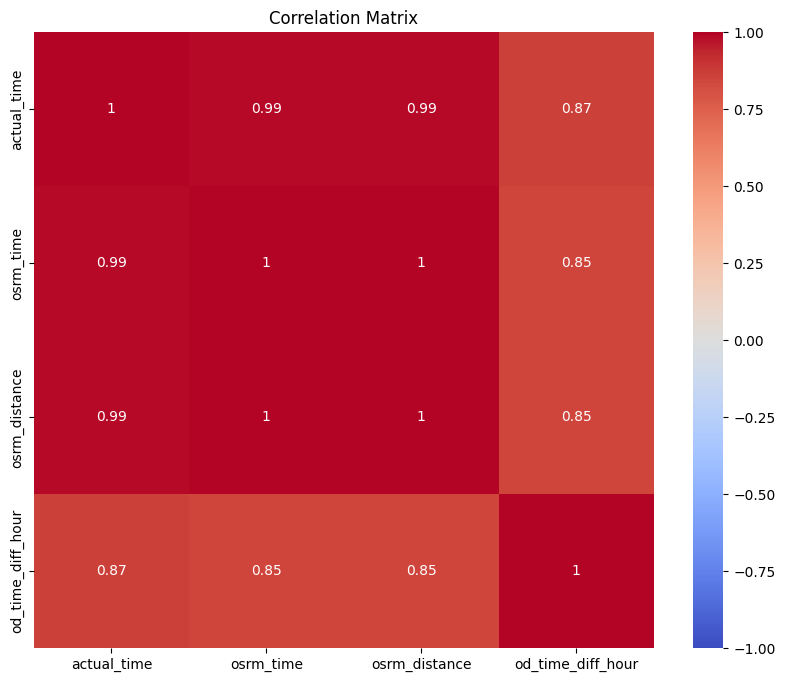

In [ ]:
# Compute correlation matrix
correlation_matrix = trip_df[['actual_time', 'osrm_time', 'osrm_distance', 'od_time_diff_hour']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(final_df['actual_time'], final_df['osrm_time'])
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


T-Statistic: 14.257613932209864, P-Value: 4.901827529662265e-46


In [ ]:
t_stat, p_val = ttest_ind(trip_df['actual_time'], trip_df['osrm_time'])
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


T-Statistic: 11.81374770218545, P-Value: 3.914969222572249e-32


In [ ]:
t_stat, p_val = ttest_ind(trip_df['actual_time'], trip_df['segment_actual_time_sum'])
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


T-Statistic: 25.169331083645798, P-Value: 2.488663668633051e-138


In [ ]:
t_stat, p_val = ttest_ind(trip_df['osrm_time'], trip_df['segment_osrm_time_sum'])
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")


T-Statistic: 24.600507792586185, P-Value: 2.673261779351757e-132


In [ ]:
t_stat, p_val = ttest_ind(trip_df['osrm_distance'], trip_df['segment_osrm_distance_sum'])
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

T-Statistic: 24.43701969811744, P-Value: 1.3679339533070238e-130


Based on hypothesis testing, we can observe that the is no any significant difference between actual time and segmented actual time sum similarly between osrm time and segmented osrm time sum and also with osrm distance and segmented osrm distance.

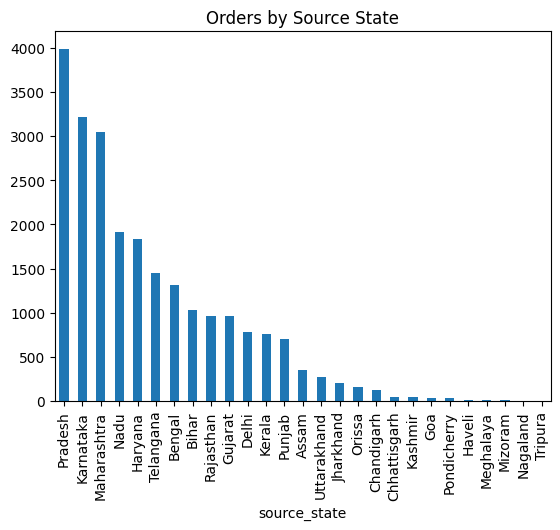

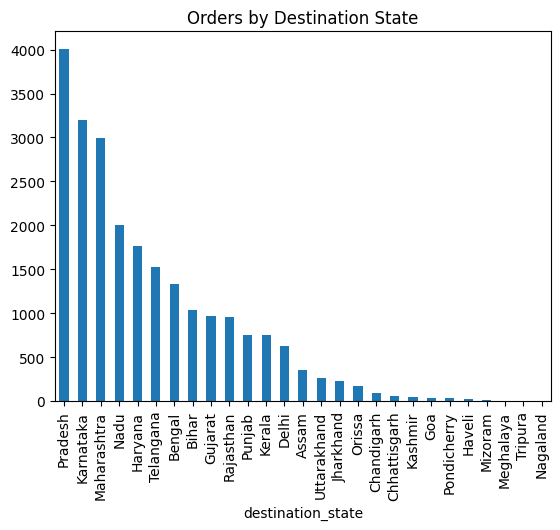

In [ ]:
final_df['source_state'].value_counts().plot(kind='bar', title='Orders by Source State')
plt.show()

final_df['destination_state'].value_counts().plot(kind='bar', title='Orders by Destination State')
plt.show()


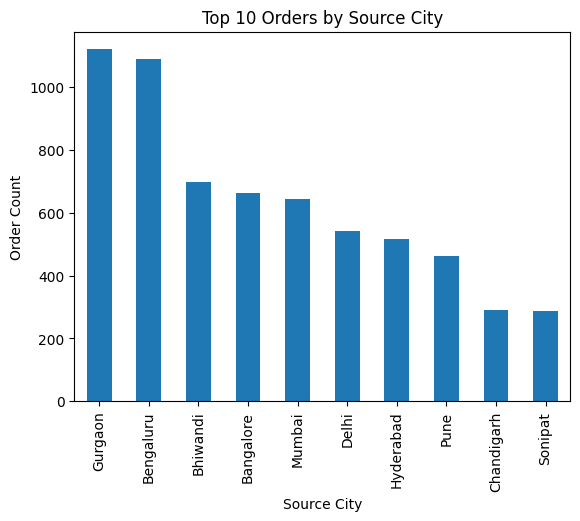

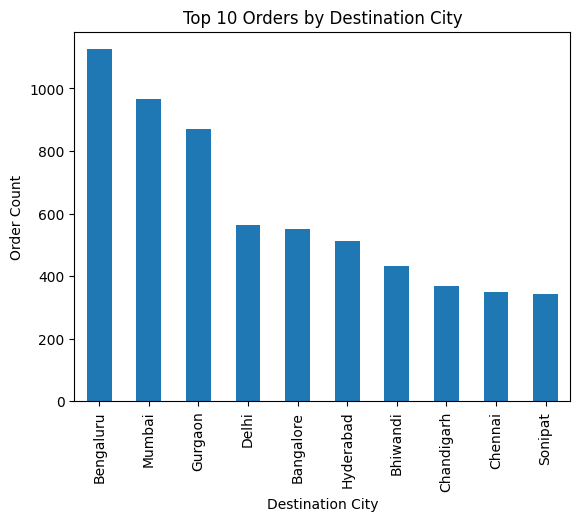

In [ ]:
# Ploting top 10 source cities by order count
top_source_cities = trip_df['source_city'].value_counts().nlargest(10)
top_source_cities.plot(kind='bar', title='Top 10 Orders by Source City')
plt.xlabel('Source City')
plt.ylabel('Order Count')
plt.show()

# Ploting top 10 destination cities by order count
top_destination_cities = trip_df['destination_city'].value_counts().nlargest(10)
top_destination_cities.plot(kind='bar', title='Top 10 Orders by Destination City')
plt.xlabel('Destination City')
plt.ylabel('Order Count')
plt.show()

In [ ]:
final_df['destination_state'].value_counts()

destination_state
Pradesh         4008
Karnataka       3198
Maharashtra     2989
Nadu            2004
Haryana         1768
Telangana       1522
Bengal          1334
Bihar           1031
Gujarat          965
Rajasthan        959
Punjab           752
Kerala           746
Delhi            630
Assam            353
Uttarakhand      262
Jharkhand        232
Orissa           175
Chandigarh        86
Chhattisgarh      52
Kashmir           45
Goa               33
Pondicherry       31
Haveli            17
Mizoram           10
Meghalaya          3
Tripura            2
Nagaland           1
Name: count, dtype: int64

In [ ]:
final_df['destination_city'].value_counts()

destination_city
Bengaluru     1180
Mumbai         999
Gurgaon        972
Bangalore      683
Hyderabad      643
              ... 
Shivpuri         1
Koraput          1
Karungaply       1
Manthuka         1
Lunawada         1
Name: count, Length: 1123, dtype: int64

In [ ]:
most_orders = final_df['destination_state'].value_counts().idxmax()
busiest_corridor = final_df.groupby(['source_state', 'destination_state']).size().idxmax()
avg_distance = final_df['actual_distance_to_destination'].mean()
avg_time = final_df['od_time_diff_hour'].mean()

print(f"Most orders are coming from: {most_orders}")
print(f"Busiest corridor: {busiest_corridor}")
print(f"Average distance: {avg_distance} km")
print(f"Average time taken: {avg_time} hours")

Most orders are coming from: Pradesh
Busiest corridor: ('Pradesh', 'Pradesh')
Average distance: 92.5330535731923 km
Average time taken: 4.983917702692396 hours


##INSIGHTS AND RECOMMENDATIONS

On transportation type FTL is used slightly higher than the carting system.

In state wise Madhya Pradesh leads with orders in both source and destination center.
Most orders are coming from: Pradesh

Busiest corridor: ('Pradesh', 'Pradesh')

Average distance: 92.5330535731923 km

Average time taken: 4.983917702692396 hours

Based on hypothesis testing, we can observe that the is no any significant difference between actual time and segmented actual time sum similarly between osrm time and segmented osrm time sum and also with osrm distance and segmented osrm distance.

Optimize routes for frequently used corridors.

Enhance operations in busy source and destination centers.

Consider improving delivery times based on segment and trip-level analysis.

